In [3]:
'''
This code lookes into digital habit category of behavioral data
- loads the filteres data, defines the acitvity column, we get the mean of the activity columns
- we compute the change of week 6- week 1, week 8-week 7
- then we save the results 

'''


import pandas as pd

# --- Load and clean ---
df = pd.read_csv("feat_dataset_filtered_with_weeks.csv")
df.columns = df.columns.str.replace(' ', '_')

# --- Define your activity columns ---
activity_cols = [
    'app_Communication_ep_0','app_Communication_ep_1', 'app_Communication_ep_2', 'app_Communication_ep_3', 'app_Communication_ep_4',
    'app_Entertainment_ep_0','app_Entertainment_ep_1', 'app_Entertainment_ep_2', 'app_Entertainment_ep_3', 'app_Entertainment_ep_4',
    'app_Social_ep_0',  'app_Social_ep_1',  'app_Social_ep_2',  'app_Social_ep_3',  'app_Social_ep_4'
]

# --- Keep only columns that exist ---
activity_cols = [c for c in activity_cols if c in df.columns]

# --- Compute per-participant averages for Week 1,6,7,8 ---
per_uid_week = (
    df[df['week_per_uid'].isin([1, 6,7,8])]
    .groupby(['uid', 'week_per_uid'])[activity_cols]
    .mean(numeric_only=True)
    .reset_index()
)
# --- Pivot to wide: one row per uid, columns = feature × week ---
wide = per_uid_week.pivot(index='uid', columns='week_per_uid')[activity_cols]

# Flatten MultiIndex columns: (feature, week) -> "feature_w{week}"
wide.columns = [f"{feat}_w{week}" for feat, week in wide.columns]

# --- Compute changes per feature ---

for feat in activity_cols:
    w1 = f"{feat}_w1"
    w6 = f"{feat}_w6"
    w7 = f"{feat}_w7"
    w8 = f"{feat}_w8"

    if w1 in wide.columns and w6 in wide.columns:
        wide[f"{feat}_change_cntx"] = wide[w6] - wide[w1]

    if w7 in wide.columns and w8 in wide.columns:
        wide[f"{feat}_change_generic"] = wide[w8] - wide[w7]

# Save if you want
wide.reset_index().to_csv("digitalHabits_change_week.csv", index=False)


/var/folders/r1/_8ps3x2x6nb6r77rz8dp80sh0000gn/T/ipykernel_25916/2939909823.py:7: DtypeWarning: Columns (427) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("feat_dataset_filtered_with_weeks.csv")


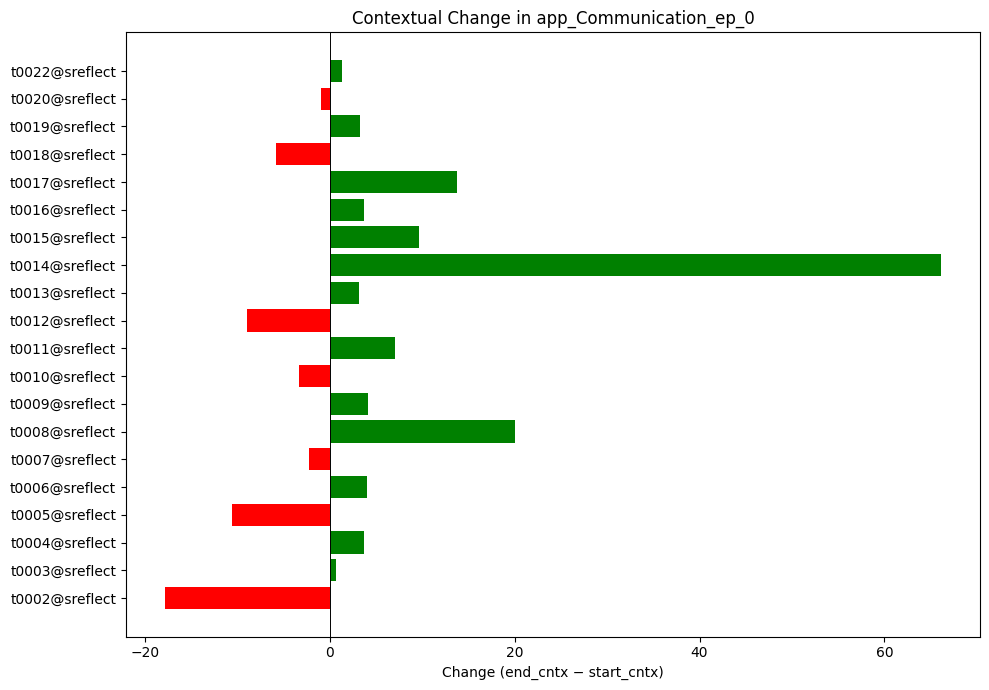

In [9]:
'''
Contextual week: 
There are 3 features in digital Habit category, and we are gonna plot each feature seperately,
loads the saved file from above and  feat = "app_Communication_ep_0" plots the graph 
to see if it improved or decreased

'''

import matplotlib.pyplot as plt
import pandas as pd

# --- Load the wide + change file ---
df = pd.read_csv("digitalHabits_change_week.csv")

# Make uid the index if it isn't already
if 'uid' in df.columns:
    df = df.set_index('uid')

feat = "app_Communication_ep_0"

# Match the actual column name in the CSV:
col = f"{feat}_change_cntx"   # <- or print(df.columns) to confirm

plot_df = df.copy()

# Replace NaN with 0 only for plotting
values = plot_df[col].fillna(0)

plt.figure(figsize=(10, 7))
plt.barh(
    plot_df.index,
    values,
    color=values.apply(lambda x: "green" if x > 0 else "red")
)

plt.axvline(0, color="black", lw=0.7)
plt.xlabel("Change (end_cntx − start_cntx)")
plt.title(f"Contextual Change in {feat}")
plt.tight_layout()
plt.show()


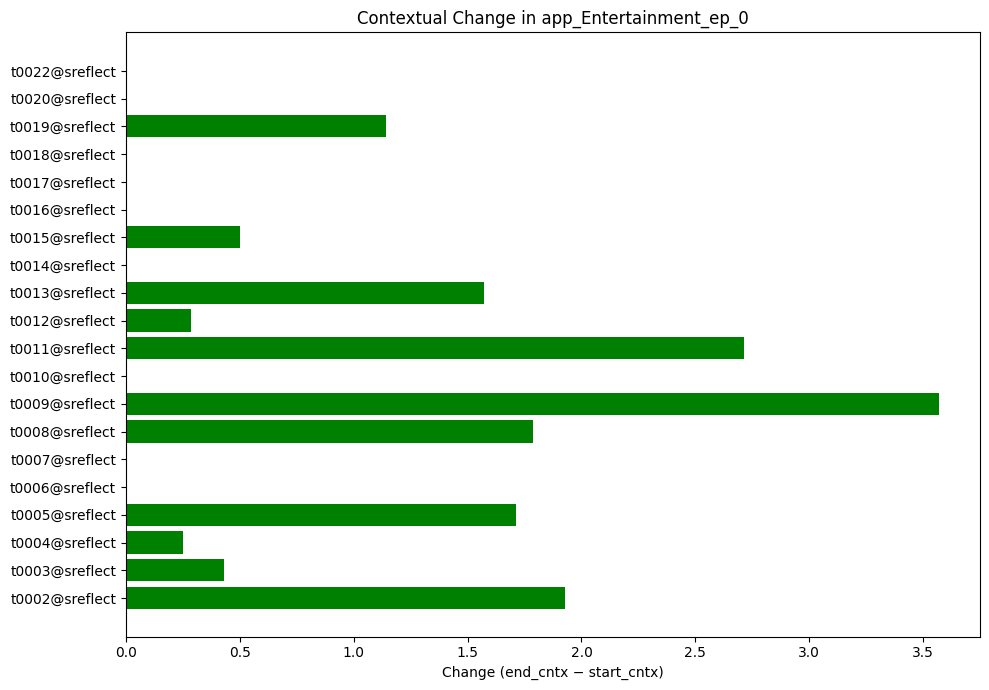

In [10]:
'''
Contextual week: 
There are 3 features in digital Habit category, and we are gonna plot each feature seperately,
loads the saved file from above and  feat = "app_Entertainment_ep_0" plots the graph 
to see if it improved or decreased

'''

import matplotlib.pyplot as plt
import pandas as pd

# --- Load the wide + change file ---
df = pd.read_csv("digitalHabits_change_week.csv")

# Make uid the index if it isn't already
if 'uid' in df.columns:
    df = df.set_index('uid')

feat = "app_Entertainment_ep_0"

# Match the actual column name in the CSV:
col = f"{feat}_change_cntx"   # <- or print(df.columns) to confirm

plot_df = df.copy()

# Replace NaN with 0 only for plotting
values = plot_df[col].fillna(0)

plt.figure(figsize=(10, 7))
plt.barh(
    plot_df.index,
    values,
    color=values.apply(lambda x: "green" if x > 0 else "red")
)

plt.axvline(0, color="black", lw=0.7)
plt.xlabel("Change (end_cntx − start_cntx)")
plt.title(f"Contextual Change in {feat}")
plt.tight_layout()
plt.show()


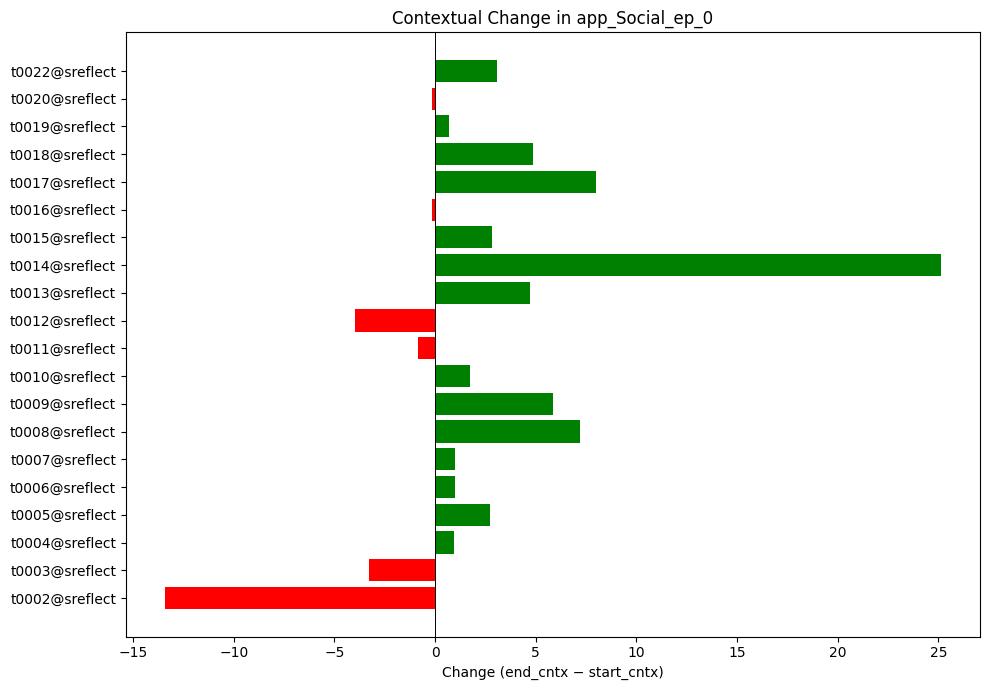

In [11]:
'''
Contextual week: 
There are 3 features in digital Habit category, and we are gonna plot each feature seperately,
loads the saved file from above and  feat = "app_Social_ep_0" plots the graph 
to see if it improved or decreased

'''




import matplotlib.pyplot as plt
import pandas as pd

# --- Load the wide + change file ---
df = pd.read_csv("digitalHabits_change_week.csv")

# Make uid the index if it isn't already
if 'uid' in df.columns:
    df = df.set_index('uid')

feat = "app_Social_ep_0"

# Match the actual column name in the CSV:
col = f"{feat}_change_cntx"   # <- or print(df.columns) to confirm

plot_df = df.copy()

# Replace NaN with 0 only for plotting
values = plot_df[col].fillna(0)

plt.figure(figsize=(10, 7))
plt.barh(
    plot_df.index,
    values,
    color=values.apply(lambda x: "green" if x > 0 else "red")
)

plt.axvline(0, color="black", lw=0.7)
plt.xlabel("Change (end_cntx − start_cntx)")
plt.title(f"Contextual Change in {feat}")
plt.tight_layout()
plt.show()

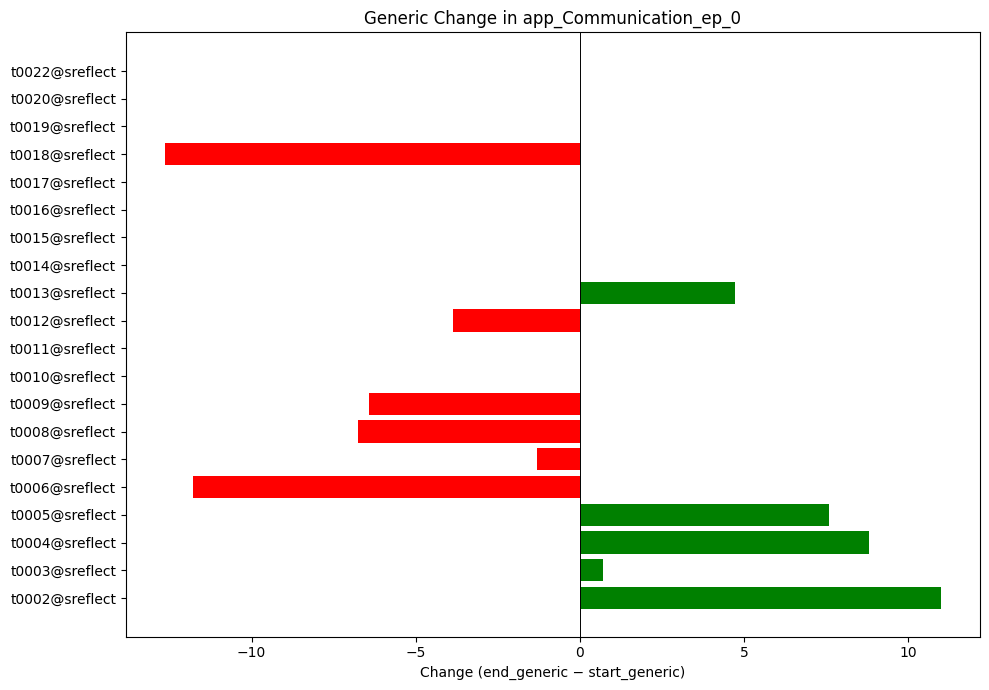

In [2]:
'''
Generic week: 
There are 3 features in digital Habit category, and we are gonna plot each feature seperately,
loads the saved file from above and  feat = "app_Communication_ep_0" plots the graph 
to see if it improved or decreased

'''

import matplotlib.pyplot as plt
import pandas as pd

# --- Load the wide + change file ---
df = pd.read_csv("digitalHabits_change_week.csv")

# Make uid the index if it isn't already
if 'uid' in df.columns:
    df = df.set_index('uid')

feat = "app_Communication_ep_0"

# Match the actual column name in the CSV:
col = f"{feat}_change_generic"   # <- or print(df.columns) to confirm

plot_df = df.copy()

# Replace NaN with 0 only for plotting
values = plot_df[col].fillna(0)

plt.figure(figsize=(10, 7))
plt.barh(
    plot_df.index,
    values,
    color=values.apply(lambda x: "green" if x > 0 else "red")
)

plt.axvline(0, color="black", lw=0.7)
plt.xlabel("Change (end_generic − start_generic)")
plt.title(f"Generic Change in {feat}")
plt.tight_layout()
plt.show()

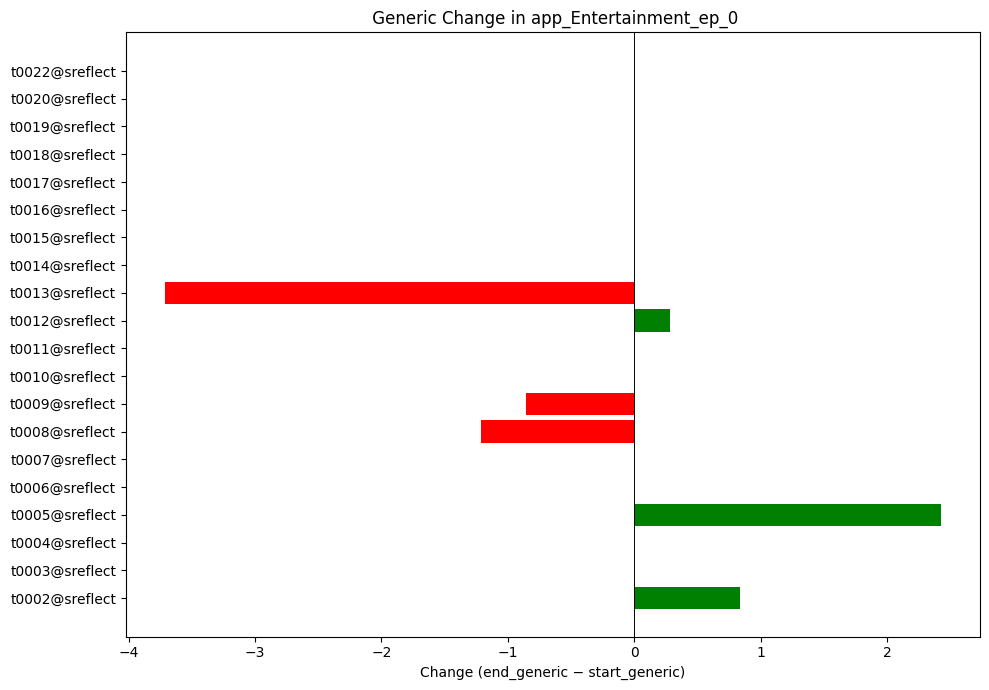

In [3]:
'''
generic week: 
There are 3 features in digital Habit category, and we are gonna plot each feature seperately,
loads the saved file from above and  feat = "app_Entertainment_ep_0" plots the graph 
to see if it improved or decreased

'''

import matplotlib.pyplot as plt
import pandas as pd

# --- Load the wide + change file ---
df = pd.read_csv("digitalHabits_change_week.csv")

# Make uid the index if it isn't already
if 'uid' in df.columns:
    df = df.set_index('uid')

feat = "app_Entertainment_ep_0"

# Match the actual column name in the CSV:
col = f"{feat}_change_generic"   # <- or print(df.columns) to confirm

plot_df = df.copy()

# Replace NaN with 0 only for plotting
values = plot_df[col].fillna(0)

plt.figure(figsize=(10, 7))
plt.barh(
    plot_df.index,
    values,
    color=values.apply(lambda x: "green" if x > 0 else "red")
)

plt.axvline(0, color="black", lw=0.7)
plt.xlabel("Change (end_generic − start_generic)")
plt.title(f" Generic Change in {feat}")
plt.tight_layout()
plt.show()

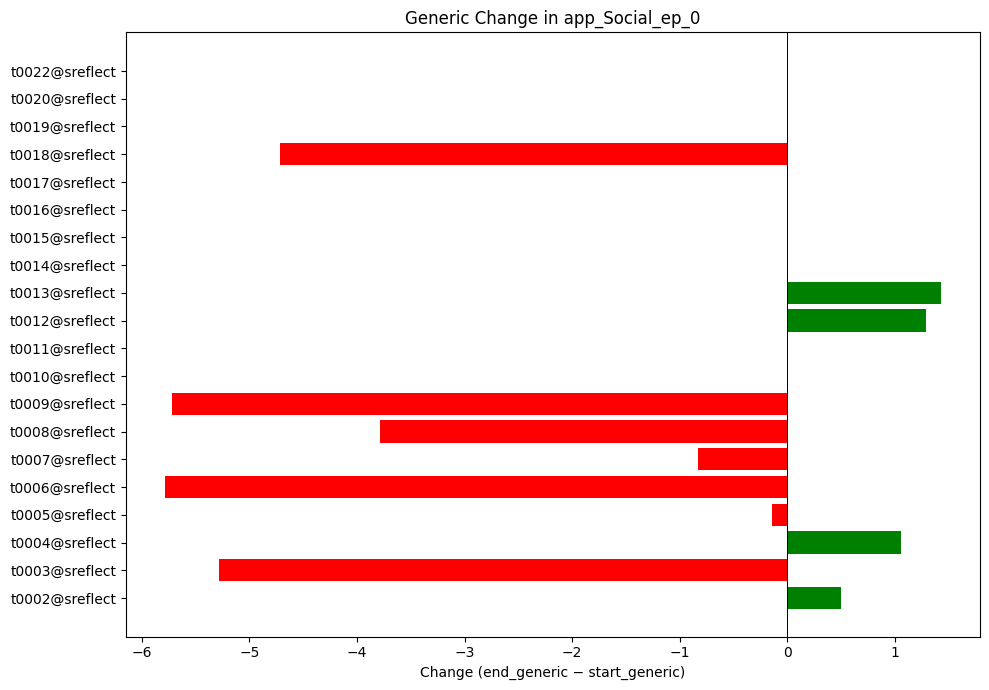

In [4]:
'''generic  week: 
There are 3 features in digital Habit category, and we are gonna plot each feature seperately,
loads the saved file from above and  feat = "app_Social_ep_0" plots the graph 
to see if it improved or decreased
'''

import matplotlib.pyplot as plt
import pandas as pd

# --- Load the wide + change file ---
df = pd.read_csv("digitalHabits_change_week.csv")

# Make uid the index if it isn't already
if 'uid' in df.columns:
    df = df.set_index('uid')

feat = "app_Social_ep_0"

# Match the actual column name in the CSV:
col = f"{feat}_change_generic"   # <- or print(df.columns) to confirm

plot_df = df.copy()

# Replace NaN with 0 only for plotting
values = plot_df[col].fillna(0)

plt.figure(figsize=(10, 7))
plt.barh(
    plot_df.index,
    values,
    color=values.apply(lambda x: "green" if x > 0 else "red")
)

plt.axvline(0, color="black", lw=0.7)
plt.xlabel("Change (end_generic − start_generic)")
plt.title(f"Generic Change in {feat}")
plt.tight_layout()
plt.show()